In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data visualization

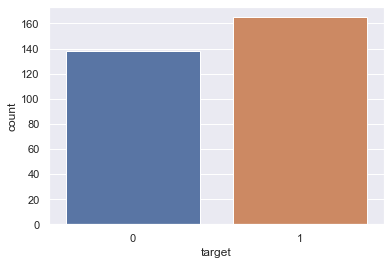

In [10]:
sns.countplot(df.target)

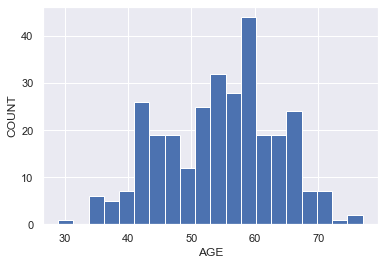

In [11]:
plt.hist(df.age, bins =20)
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

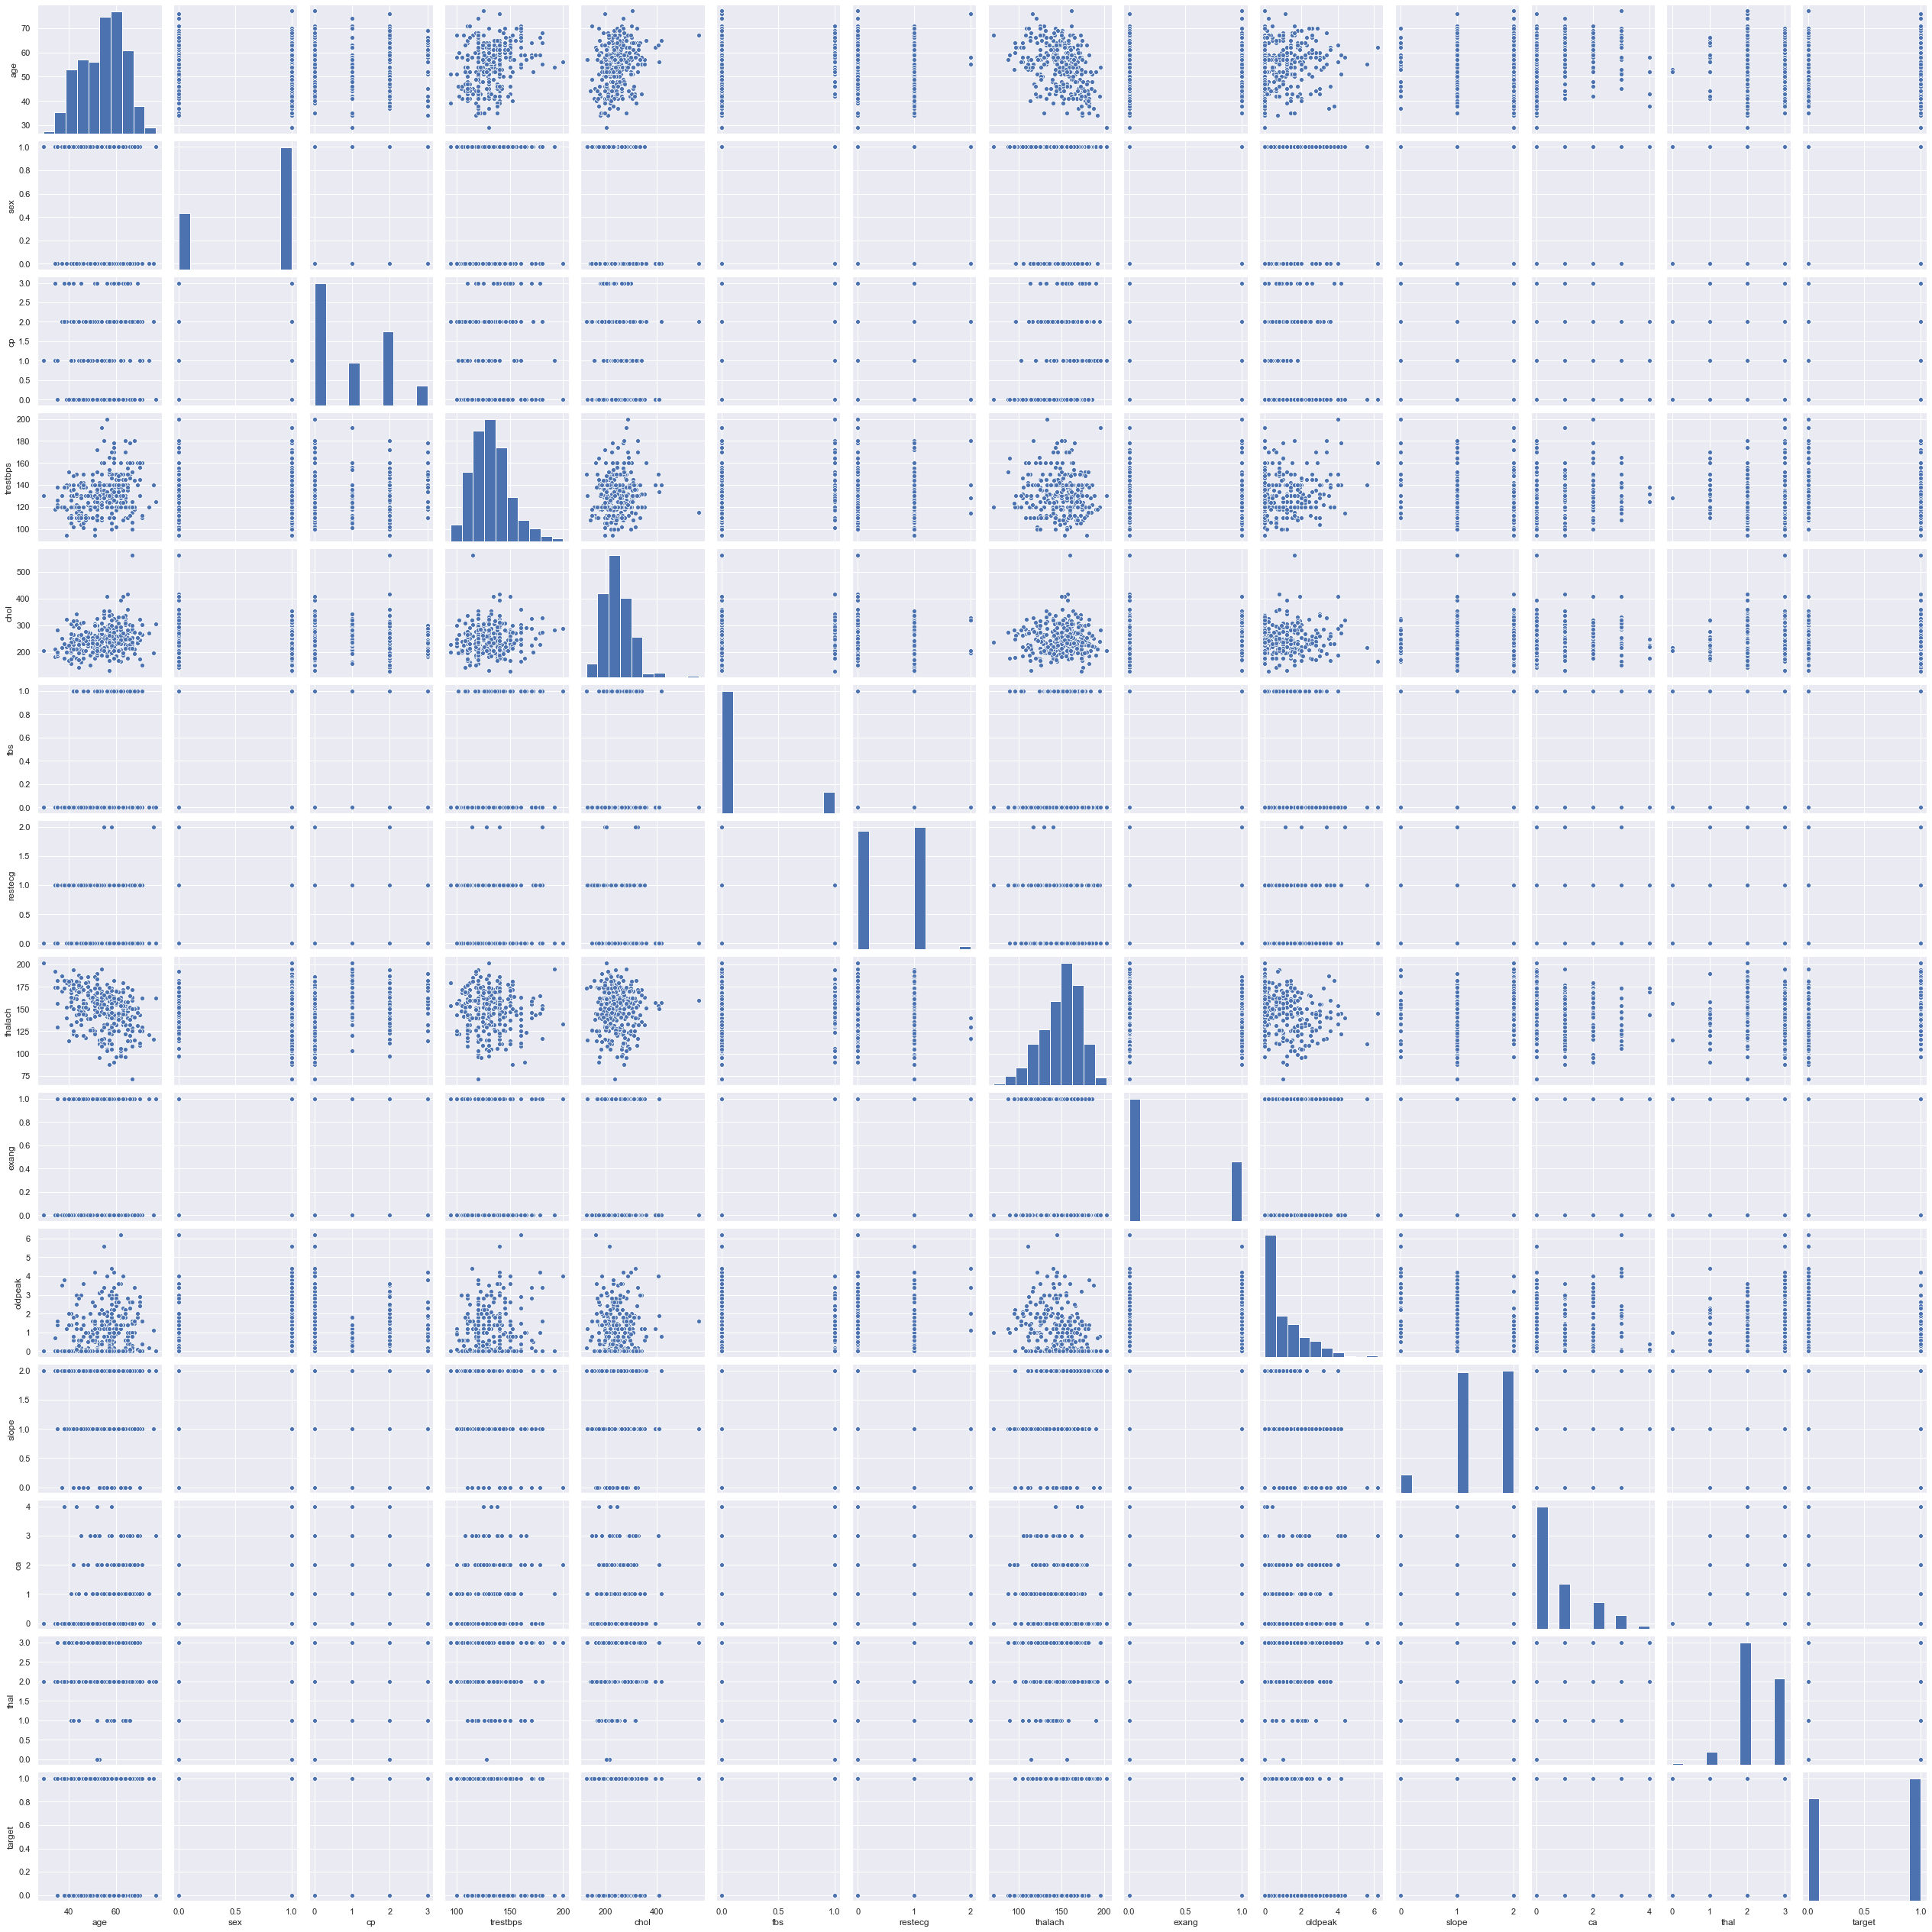

In [12]:
sns.pairplot(df)

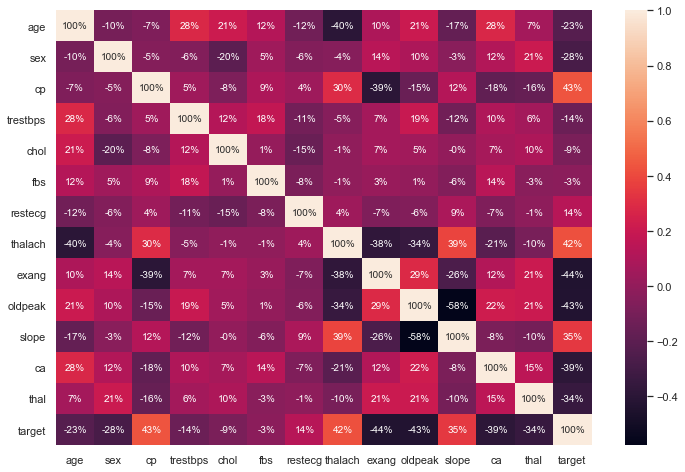

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), fmt='.0%', annot=True)

# Data Preprocessing

Even though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal')features.
The Reason being that we do not want the Algorithm to think that '0' is the Lowest and '1' is the Highest value which can be seen in the column 'Sex'(taking an example), since Gender is not an ordinal value.

In [14]:
df_new =  pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [15]:
df_new.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [16]:
df_new.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_scaling = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_new[columns_scaling] =  sc.fit_transform(df_new[columns_scaling])

In [18]:
df_new.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Model Building

1. RandomForest
2. DecisionTrees
3. Logistic Regression 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split

In [20]:
X = df_new.iloc[:, :-1]
print(X.shape)

(303, 22)


In [21]:
y = df_new.iloc[:, -1]
y.value_counts()

0    186
1    117
Name: thal_3, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (227, 22)
X_test :  (76, 22)
y_train :  (227,)
y_test :  (76,)


For Each of the Above mentioned Models we will try to utilize the RandomSearchCV to determine their best Parameters for achieving the best scores.

1. RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_jobs=-1)
param_rf = {'n_estimators' : [50, 100, 200, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth':[3, 5,10, None],
    'min_samples_leaf': randint(1,3),
    'max_features' : ['auto','sqrt' ,'log2' ],
    'bootstrap' : [True, False]}

In [24]:
rf_random_cv = RandomizedSearchCV(rf, param_distributions=param_rf, cv=5, n_jobs=-1, n_iter=10 )

In [25]:
rf_random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023F29D09970>,
                                        'n_estimators': [50, 100, 200, 250]})

In [26]:
print('The best Score is: ',rf_random_cv.best_score_)
print('The best estimator is: ',rf_random_cv.best_estimator_)
print('The best Parameter is : ',rf_random_cv.best_params_)

The best Score is:  0.9912077294685989
The best estimator is:  RandomForestClassifier(bootstrap=False, max_depth=5, max_features='log2',
                       n_estimators=200, n_jobs=-1)
The best Parameter is :  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}


2. DecisionTree

In [27]:
d_tree = DecisionTreeClassifier()

In [28]:
param_d_tree = param_rf = { 'criterion': ['gini', 'entropy'],
    'max_depth':[3, 5,10, None],
    'min_samples_leaf': randint(1,3),
    'max_features' : ['auto','sqrt' ,'log2' ] }

In [29]:
rscv_tree = RandomizedSearchCV(d_tree, param_distributions=param_d_tree, n_jobs=-1, n_iter=10, cv=5, return_train_score=False)

In [30]:
rscv_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023F2639C3A0>})

In [31]:
print('The best Score is: ',rscv_tree.best_score_)
print('----------------------')
print('The best estimator is: ',rscv_tree.best_estimator_)
print('----------------------')
print('The best Parameter is : ',rscv_tree.best_params_)

The best Score is:  0.9208695652173914
----------------------
The best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')
----------------------
The best Parameter is :  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1}


3. Logistic Regression

In [32]:
lr = LogisticRegression()

In [33]:
lr_param = {'penalty':['l2'],
            'C' : [1, 0.1, 0.01],
            'solver':['lbfgs'] }


In [34]:
rscv_lr = RandomizedSearchCV(lr, param_distributions=lr_param, n_jobs=-1, n_iter=10, cv=5, return_train_score=False)

In [35]:
rscv_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 0.1, 0.01], 'penalty': ['l2'],
                                        'solver': ['lbfgs']})

In [36]:
print('The best Score is: ',rscv_lr.best_score_)
print('----------------------')
print('The best estimator is: ',rscv_lr.best_estimator_)
print('----------------------')
print('The best Parameter is : ',rscv_lr.best_params_)

The best Score is:  0.9912077294685989
----------------------
The best estimator is:  LogisticRegression(C=1)
----------------------
The best Parameter is :  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}


In [37]:
print(pd.DataFrame([{'Model' : 'RandomForest', 'Best Score': rf_random_cv.best_score_},
                   {'Model' : 'DecisionTree', 'Best Score': rscv_tree.best_score_},
                   {'Model' : 'Logistic Regression', 'Best Score': rscv_lr.best_score_}]))

                 Model  Best Score
0         RandomForest    0.991208
1         DecisionTree    0.920870
2  Logistic Regression    0.991208


Since Logistic Regression Provides us the Best Score, We will go ahead with Logistic Regression Model

In [38]:
lr_new = LogisticRegression(penalty='l2',C=1.0, solver = 'lbfgs') 

In [39]:
lr_new.fit(X_train, y_train)

LogisticRegression()

In [40]:
lr_new.score(X_test, y_test)

0.9868421052631579

In [41]:
y_pred = lr_new.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('classification report is : ')
print(classification_report(y_test, y_pred))
print('-----------------------------------------------------------------')
print('The Accuracy is : ')
print(accuracy_score(y_test, y_pred))

classification report is : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.98        30

    accuracy                           0.99        76
   macro avg       0.98      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76

-----------------------------------------------------------------
The Accuracy is : 
0.9868421052631579


Text(0.5, 1.0, 'CONFUSION MATRIX')

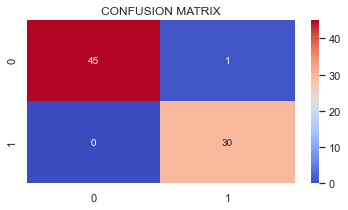

In [48]:
plt.figure(figsize=(6,3))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot= True, cmap = 'coolwarm')
plt.title('CONFUSION MATRIX')